# Time Series

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [2]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2021, 4, 7)

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

In [4]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [5]:
stamp = datetime(2011, 1, 3)
print(str(stamp))
stamp.strftime('%Y-%m-%d')

2011-01-03 00:00:00


'2011-01-03'

In [6]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [7]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [8]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [9]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [10]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [11]:
idx = pd.to_datetime(datestrs + [None])
print(idx)
idx[2]
pd.isnull(idx)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)


array([False, False,  True])

## Time Series Basics

In [12]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [13]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [14]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [15]:
ts + ts[::2] # float + NaN -> NaN

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [16]:
ts.index.dtype

dtype('<M8[ns]')

In [17]:
stamp = ts.index[0]
stamp
stamp?

Type:        Timestamp
String form: 2011-01-02 00:00:00
File:        c:\python39\lib\site-packages\pandas\_libs\tslibs\timestamps.cp39-win_amd64.pyd
Docstring:  
Pandas replacement for python datetime.datetime object.

Timestamp is the pandas equivalent of python's Datetime
and is interchangeable with it in most cases. It's the type used
for the entries that make up a DatetimeIndex, and other timeseries
oriented data structures in pandas.

Parameters
----------
ts_input : datetime-like, str, int, float
    Value to be converted to Timestamp.
freq : str, DateOffset
    Offset which Timestamp will have.
tz : str, pytz.timezone, dateutil.tz.tzfile or None
    Time zone for time which Timestamp will have.
unit : str
    Unit used for conversion if ts_input is of type int or float. The
    valid values are 'D', 'h', 'm', 's', 'ms', 'us', and 'ns'. For
    example, 's' means seconds and 'ms' means milliseconds.
year, month, day : int
hour, minute, second, microsecond : int, optional, default

### Indexing, Selection, Subsetting

In [18]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [19]:
print(ts.index)
print(ts['1/10/2011'])  # 可以通过时间字符串作为索引
print(ts['20110110'])

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)
1.9657805725027142
1.9657805725027142


In [20]:
pd.date_range('3/4/2021', periods=10)
pd.date_range?

Signature:
pd.date_range(
    start=None,
    end=None,
    periods=None,
    freq=None,
    tz=None,
    normalize=False,
    name=None,
    closed=None,
    **kwargs,
) -> pandas.core.indexes.datetimes.DatetimeIndex
Docstring:
Return a fixed frequency DatetimeIndex.

Parameters
----------
start : str or datetime-like, optional
    Left bound for generating dates.
end : str or datetime-like, optional
    Right bound for generating dates.
periods : int, optional
    Number of periods to generate.
freq : str or DateOffset, default 'D'
    Frequency strings can have multiples, e.g. '5H'. See
    :ref:`here <timeseries.offset_aliases>` for a list of
    frequency aliases.
tz : str or tzinfo, optional
    Time zone name for returning localized DatetimeIndex, for example
    'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
    timezone-naive.
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range.
name : str, default None
    Name 

In [21]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001'] # 选择一年的数据

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [22]:
longer_ts['2001-05'] # 选择一个月的数据

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [23]:
ts[datetime(2011, 1, 7):] # slice, 选择2011-1-7之后的数据

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [24]:
ts
ts['1/6/2011':'1/11/2011'] # slice

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [25]:
print(ts)
print(ts.truncate(after='1/9/2011'))
ts.truncate?

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64
2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64


Signature: ts.truncate(before=None, after=None, axis=None, copy: 'bool_t' = True) -> 'FrameOrSeries'
Docstring:
Truncate a Series or DataFrame before and after some index value.

This is a useful shorthand for boolean indexing based on index
values above or below certain thresholds.

Parameters
----------
before : date, str, int
    Truncate all rows before this index value.
after : date, str, int
    Truncate all rows after this index value.
axis : {0 or 'index', 1 or 'columns'}, optional
    Axis to truncate. Truncates the index (rows) by default.
copy : bool, default is True,
    Return a copy of the truncated section.

Returns
-------
type of caller
    The truncated Series or DataFrame.

See Also
--------
DataFrame.loc : Select a subset of a DataFrame by label.
DataFrame.iloc : Select a subset of a DataFrame by position.

Notes
-----
If the index being truncated contains only datetime values,
`before` and `after` may be specified as strings instead of
Timestamps.

Examples
-------

In [26]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001'] # 获取一个月的数据

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices

In [27]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [28]:
dup_ts.index.is_unique

False

In [29]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [30]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [31]:
ts
print(ts)
resampler = ts.resample('D')
resampler

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64


### Generating Date Ranges

In [32]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [33]:
print(pd.date_range(start='2012-04-01', periods=20))
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')


DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [34]:
pd.date_range('2000-01-01', '2000-12-02', freq='BM') # business month end

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [35]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [36]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [37]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour?

Call signature:  hour(*args, **kwargs)
Type:            Hour
String form:     <Hour>
File:            c:\python39\lib\site-packages\pandas\_libs\tslibs\offsets.cp39-win_amd64.pyd
Docstring:       <no docstring>
Class docstring: Base class for DateOffset methods that are not overridden by subclasses.


In [38]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [39]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [40]:
Hour(2) + Minute(30)

<150 * Minutes>

In [41]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [42]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [43]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
# ts.shift?
print(ts)
ts.shift(2)     # 向上移动index
ts.shift(-2)    # 向下移动index

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64


2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [44]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29   -13.564241
2000-03-31    -1.139975
2000-04-30     3.410958
Freq: M, dtype: float64

In [45]:
print(ts)
ts.shift(2, freq='M')

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64


2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [46]:
ts.shift(3, freq='D')
# ts.shift(1, freq='90T')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

#### Shifting dates with offsets

In [47]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [48]:
print(now + MonthEnd()) # now的月底
now + MonthEnd(2) # now的下一个月底

2011-11-30 00:00:00


Timestamp('2011-12-31 00:00:00')

In [49]:
offset = MonthEnd()
print(offset.rollforward(now))  # 到月底
print(offset.rollback(now))     # 到上一个月月底
print(now - offset)

2011-11-30 00:00:00
2011-10-31 00:00:00
2011-10-31 00:00:00


In [50]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(ts)
ts.groupby(offset.rollforward).mean() # 按月统计

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64


2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [51]:
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

## Time Zone Handling

In [52]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [53]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [54]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [55]:
print(ts.index.tz)

None


In [56]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [57]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [58]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64

In [59]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
dtype: float64

In [60]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

### Operations with Time Zone−Aware Timestamp Objects

In [61]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [62]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [63]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [64]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [65]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [66]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

## Periods and Period Arithmetic

In [67]:
# (B)A(S)-DEC 一年的时间范围
# annual frequency, anchored end of December. Same as ‘A’
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [68]:
print(p + 5)
print(p - 2)

2012
2005


In [69]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [70]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [71]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64

In [72]:
'''
(B)Q(S)-DEC: quarterly frequency, year ends in December. Same as ‘Q’
一个季度的时间范围
'''
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [73]:
# (B)A(S)-DEC 一年的时间范围
# annual frequency, anchored end of December. Same as ‘A’
p = pd.Period('2007', freq='A-DEC') 
print(p)
print(p.asfreq('M', how='start'))  # 年度区间转化为开始时的月度区间
print(p.asfreq('M', how='end'))     # 年度区间转化为结束时的月度区间

2007
2007-01
2007-12


In [74]:
p = pd.Period('2007', freq='A-JUN')  # 年度区间, 6月底为年末
p
print(p.asfreq('M', 'start'))
print(p.asfreq('M', 'end'))

2006-07
2007-06


In [75]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [76]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ts.asfreq('M', how='start')

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64


2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64

In [77]:
ts.asfreq('B', how='end')

2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [78]:
p = pd.Period('2012Q4', freq='Q-JAN') # 季度范围，1月份结束
p

Period('2012Q4', 'Q-JAN')

In [79]:
print(p.asfreq('D', 'start'))
print(p.asfreq('D', 'end'))

2011-11-01
2012-01-31


In [80]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [81]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
print(ts)
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

In [82]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
print(ts)
pts = ts.to_period()
pts

2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64


2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64

In [83]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
print(ts2)
tm = ts2.to_period('M')
tm

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64


2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64

In [84]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [122]:
data = pd.read_csv('examples/macrodata.csv')
# print(data.info())
print(data.head(5))
data.quarter

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  


0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [123]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
print(index)
data.index = index
data.infl

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [130]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
print(ts.resample('M'))
print(ts.resample('M').mean())
ts.resample('M', kind='period').mean()

2000-01-01   -1.636743
2000-01-02   -0.176932
2000-01-03    1.638157
2000-01-04   -0.327037
2000-01-05    0.228602
                ...   
2000-04-05    0.129164
2000-04-06   -0.335250
2000-04-07    1.846637
2000-04-08    0.729657
2000-04-09    2.423712
Freq: D, Length: 100, dtype: float64
DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, origin=start_day]
2000-01-31   -0.180878
2000-02-29    0.175553
2000-03-31   -0.429701
2000-04-30    0.598429
Freq: M, dtype: float64


2000-01   -0.180878
2000-02    0.175553
2000-03   -0.429701
2000-04    0.598429
Freq: M, dtype: float64

In [131]:
ts.resample?

Signature:
ts.resample(
    rule,
    axis=0,
    closed: 'Optional[str]' = None,
    label: 'Optional[str]' = None,
    convention: 'str' = 'start',
    kind: 'Optional[str]' = None,
    loffset=None,
    base: 'Optional[int]' = None,
    on=None,
    level=None,
    origin: 'Union[str, TimestampConvertibleTypes]' = 'start_day',
    offset: 'Optional[TimedeltaConvertibleTypes]' = None,
) -> 'Resampler'
Docstring:
Resample time-series data.

Convenience method for frequency conversion and resampling of time
series. Object must have a datetime-like index (`DatetimeIndex`,
`PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
to the `on` or `level` keyword.

Parameters
----------
rule : DateOffset, Timedelta or str
    The offset string or object representing target conversion.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Which axis to use for up- or down-sampling. For `Series` this
    will default to 0, i.e. along the rows. Must be
    `DatetimeIndex`, `TimedeltaInd

### Downsampling

In [88]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [89]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [90]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [91]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [92]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

<ipython-input-92-b63ded3800c4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling

In [93]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [94]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [95]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [96]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [97]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [98]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


### Resampling with Periods

In [99]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


In [133]:
# Q-DEC: Quarterly, year ending in December
print(annual_frame.resample('Q-DEC').ffill())
annual_frame.resample('Q-DEC', convention='end').ffill()

        Colorado     Texas  New York      Ohio
2000Q1  0.556703  0.016631  0.111873 -0.027445
2000Q2  0.556703  0.016631  0.111873 -0.027445
2000Q3  0.556703  0.016631  0.111873 -0.027445
2000Q4  0.556703  0.016631  0.111873 -0.027445
2001Q1  0.046303  0.163344  0.251503 -0.157276
2001Q2  0.046303  0.163344  0.251503 -0.157276
2001Q3  0.046303  0.163344  0.251503 -0.157276
2001Q4  0.046303  0.163344  0.251503 -0.157276


,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [101]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


## Moving Window Functions

In [140]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
print(close_px_all)                           
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

              AAPL   MSFT    XOM      SPX
2003-01-02    7.40  21.11  29.22   909.03
2003-01-03    7.45  21.14  29.24   908.59
2003-01-06    7.45  21.52  29.96   929.01
2003-01-07    7.43  21.93  28.95   922.93
2003-01-08    7.28  21.31  28.83   909.93
...            ...    ...    ...      ...
2011-10-10  388.81  26.94  76.28  1194.89
2011-10-11  400.29  27.00  76.27  1195.54
2011-10-12  402.19  26.96  77.16  1207.25
2011-10-13  408.43  27.18  76.37  1203.66
2011-10-14  422.00  27.27  78.11  1224.58

[2214 rows x 4 columns]


In [157]:
index=pd.period_range('2021-03-12', '2021-4-14', freq='B')
# print(index)
s = pd.Series(np.arange(24), index=index)
print(s)
s.resample('D').bfill() # ffill用前面的值fill, bfill()用后面的值fill

2021-03-12     0
2021-03-15     1
2021-03-16     2
2021-03-17     3
2021-03-18     4
2021-03-19     5
2021-03-22     6
2021-03-23     7
2021-03-24     8
2021-03-25     9
2021-03-26    10
2021-03-29    11
2021-03-30    12
2021-03-31    13
2021-04-01    14
2021-04-02    15
2021-04-05    16
2021-04-06    17
2021-04-07    18
2021-04-08    19
2021-04-09    20
2021-04-12    21
2021-04-13    22
2021-04-14    23
Freq: B, dtype: int32


2021-03-12     0
2021-03-13     1
2021-03-14     1
2021-03-15     1
2021-03-16     2
2021-03-17     3
2021-03-18     4
2021-03-19     5
2021-03-20     6
2021-03-21     6
2021-03-22     6
2021-03-23     7
2021-03-24     8
2021-03-25     9
2021-03-26    10
2021-03-27    11
2021-03-28    11
2021-03-29    11
2021-03-30    12
2021-03-31    13
2021-04-01    14
2021-04-02    15
2021-04-03    16
2021-04-04    16
2021-04-05    16
2021-04-06    17
2021-04-07    18
2021-04-08    19
2021-04-09    20
2021-04-10    21
2021-04-11    21
2021-04-12    21
2021-04-13    22
2021-04-14    23
Freq: D, dtype: int32

<AxesSubplot:>

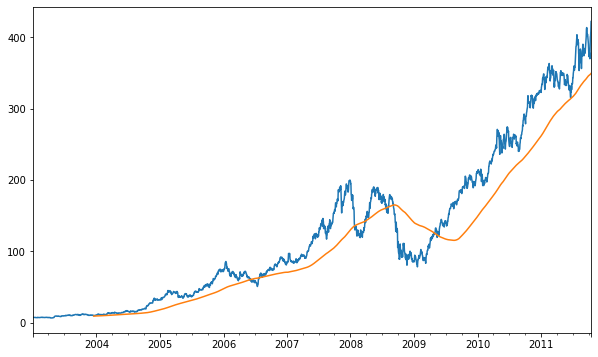

In [139]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [158]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

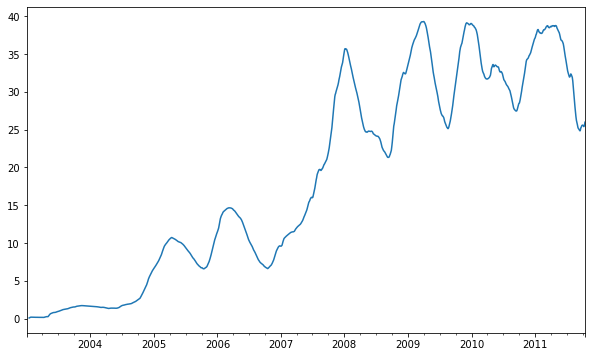

In [159]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [160]:
expanding_mean = appl_std250.expanding().mean()

In [161]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

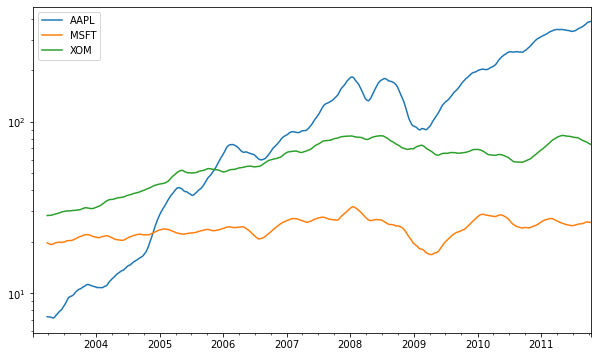

In [162]:
close_px.rolling(60).mean().plot(logy=True)

In [163]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [110]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

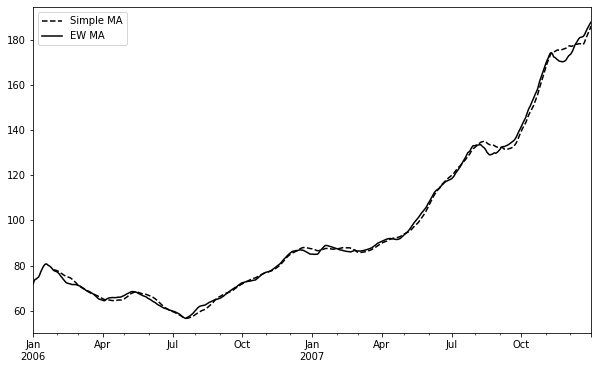

In [165]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [166]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [167]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

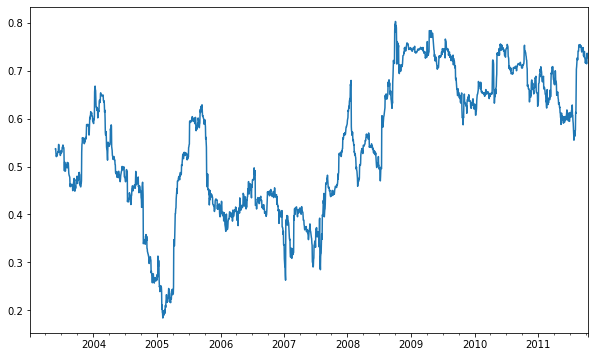

In [168]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [169]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

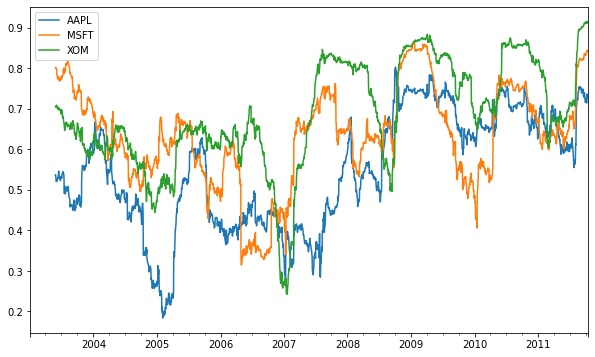

In [170]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [171]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

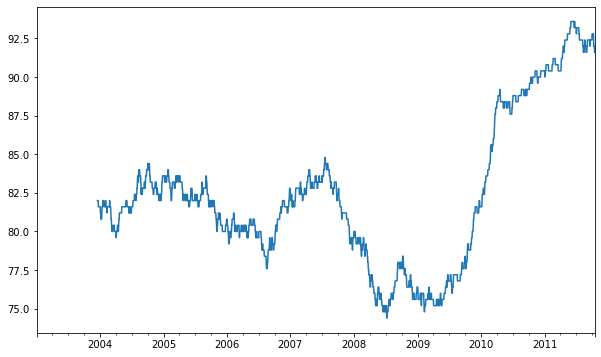

In [172]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [173]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion